# Análisis exploratorio, limpieza y transformación de datos en Python


In [ ]:
#importamos los paquetes necesarios
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py


In [ ]:
path = "/home/clientes.csv"

In [ ]:
#importamos el archivo csv
data = pd.read_csv(path,sep=',', encoding='latin-1')

Dimensionamos nuestro dataset de entrenamiento y testing, para saber con cuántos datos contaremos y con cuántas variables trabajaremos.

In [ ]:
#previsualizamos los primeros datos y validamos que se hayan importado correctamente
data.head()

,IdCliente,IdCiudad,Nombre,Apellido,FechaNacimiento,EstadoCivil,Genero,Email,IngresoAnual,TotalHijos,...,Ocupacion,Propietario,CantAutomoviles,Direccion,Telefono,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta
0,20887,206,Damien,Li,04/07/1966,S,M,damien2@mineriadedatos.com.ar,10000.0,4,...,Obrero,1,1,'2 route de Marseille','500 555-0159',13/05/2008,'0-1 Km.',Centro,46,1
1,29319,14,Alvin,Pal,14/07/1957,S,M,alvin34@mineriadedatos.com.ar,70000.0,1,...,'Obrero especializado',0,1,'5323 Stanford St','500 555-0127',03/11/2007,'0-1 Km.',Sur,55,1
2,20716,157,Kristina,Arun,13/09/1973,C,F,kristina7@mineriadedatos.com.ar,40000.0,1,...,'Obrero especializado',1,1,'Waldstr 29','500 555-0186',05/11/2006,'0-1 Km.',Centro,39,1
3,20381,627,Blake,Bennett,07/06/1938,C,M,blake49@mineriadedatos.com.ar,60000.0,3,...,GestiÃ³n,1,2,'7310 Heather Road',590-555-0124,02/05/2008,'10+ Km.',Norte,74,0
4,15013,329,Julia,Campbell,13/11/1976,S,F,julia6@mineriadedatos.com.ar,60000.0,0,...,'Obrero especializado',0,2,'6258 Stinson',606-555-0185,04/11/2007,'1-2 Km.',Norte,36,0


In [ ]:
#Tamaño del dataset
data.shape

(6400, 21)

### Resumen estadístico de las variables numéricas

In [ ]:
data.describe()

,IdCliente,IdCiudad,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta
count,6400.000000,6400.000000,6390.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,20209.983594,260.932187,57532.081377,1.894844,0.676562,1.547656,51.195469,0.394375
std,5317.325606,196.443328,32331.969091,1.630993,0.467825,1.147060,11.517698,0.488754
min,11002.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,15623.750000,66.000000,30000.000000,0.000000,0.000000,1.000000,42.000000,0.000000
50%,20291.500000,244.000000,60000.000000,2.000000,1.000000,2.000000,49.000000,0.000000
75%,24758.750000,347.000000,70000.000000,3.000000,1.000000,2.000000,59.000000,1.000000
max,29480.000000,648.000000,170000.000000,5.000000,1.000000,4.000000,102.000000,1.000000


Vemos que la variable IngresoAnual presenta valores nulos.
Además, analizamos los datos estadísticos de cada columna. El min y max nos revela que hay rangos muy variados entre las diferentes variables, lo que nos indica que probablemente debamos normalizar.

---



Análisis de la varianza de las variables numéricas.
La varianza es una medida de la dispersión de los valores en una columna.
Cuanto mayor sea la varianza, más dispersos estarán los valores.
Por lo tanto, la varianza es una medida importante de la variabilidad de los datos.

In [ ]:
data.var(numeric_only= True)

IdCliente          2.827395e+07
IdCiudad           3.858998e+04
IngresoAnual       1.045356e+09
TotalHijos         2.660139e+00
Propietario        2.188599e-01
CantAutomoviles    1.315747e+00
Edad               1.326574e+02
ComproBicicleta    2.388807e-01
dtype: float64

En este caso, los datos de IdCliente, Propietario, Compró bicileta no son representativos, ya que el primero presenta valores muy grandes y variados (que no se repiten) y los otros dos son binomiales. Por otro lado, vemos que IngresoAnual y Edad muestran un alto valor de varianza, lo cual nos indica que los datos de esas columnas se encuentran dispersos. Las variables TotalHijos y CantAutomoviles tienen un valor bajo de varianza, es decir, presentan datos menos dispersos.

### Análisis de las variables categóricas
Contamos la cantidad de registros por cada valor posible que asume cada una de las variables, para saber si cada categoría cuenta con la cantidad de registros suficientes para estar representada en el entrenamiento del modelo.

In [ ]:
print(data["Genero"].value_counts()) #Moda
print("-------------------------")
print(data["Ocupacion"].value_counts())
print("-------------------------")
print(data["Educacion"].value_counts())
print("-------------------------")
print(data["Propietario"].value_counts())
print("-------------------------")
print(data["Distancia"].value_counts())
print("-------------------------")
print(data["Region"].value_counts())
print("-------------------------")
print(data["ComproBicicleta"].value_counts())

M    3223
F    3177
Name: Genero, dtype: int64
-------------------------
Profesional               1946
'Obrero especializado'    1537
GestiÃ³n                  1098
Administrativo             998
Obrero                     821
Name: Ocupacion, dtype: int64
-------------------------
Licenciatura                            1800
'Estudios universitarios (en curso)'    1774
'EducaciÃ³n secundaria'                 1150
'Estudios de postgrado'                 1119
'EducaciÃ³n secundaria (en curso)'       557
Name: Educacion, dtype: int64
-------------------------
1    4330
0    2070
Name: Propietario, dtype: int64
-------------------------
'0-1 Km.'     2166
'5-10 Km.'    1122
'2-5 Km.'     1114
'1-2 Km.'     1080
'10+ Km.'      918
Name: Distancia, dtype: int64
-------------------------
Norte       3310
Centro      1880
Sur         1209
Noroeste       1
Name: Region, dtype: int64
-------------------------
0    3876
1    2524
Name: ComproBicicleta, dtype: int64


La variable género tiene una cantidad muy similar de registros para cada uno de sus valores posibles.
Dentro de región, notamos que para "Noroeste" solo tenemos un registro. Esto debemos tenerlo en cuenta a la hora de analizar el modelo, ya que el mismo no será representativo para las personas de esa región.
La variable a predecir, ComproBicileta, tiene mas registros con valor 0 que con 1, esto debemos considerarlo a la hora de separar los datos de entrenamiento de los de prueba para tener el debido cuidado de que se respete la proporción en ambos datasets.

In [ ]:
#Proporciones
print(data["Genero"].value_counts() / data.shape[0] * 100)
print("-------------------------")
print(data["Ocupacion"].value_counts() / data.shape[0] * 100)
print("-------------------------")
print(data["Educacion"].value_counts() / data.shape[0] * 100)
print("-------------------------")
print(data["Propietario"].value_counts() / data.shape[0] * 100)
print("-------------------------")
print(data["Distancia"].value_counts() / data.shape[0] * 100)
print("-------------------------")
print(data["Region"].value_counts() / data.shape[0] * 100)
print("-------------------------")
print(data["ComproBicicleta"].value_counts() / data.shape[0] * 100)

M    50.359375
F    49.640625
Name: Genero, dtype: float64
-------------------------
Profesional               30.406250
'Obrero especializado'    24.015625
GestiÃ³n                  17.156250
Administrativo            15.593750
Obrero                    12.828125
Name: Ocupacion, dtype: float64
-------------------------
Licenciatura                            28.125000
'Estudios universitarios (en curso)'    27.718750
'EducaciÃ³n secundaria'                 17.968750
'Estudios de postgrado'                 17.484375
'EducaciÃ³n secundaria (en curso)'       8.703125
Name: Educacion, dtype: float64
-------------------------
1    67.65625
0    32.34375
Name: Propietario, dtype: float64
-------------------------
'0-1 Km.'     33.84375
'5-10 Km.'    17.53125
'2-5 Km.'     17.40625
'1-2 Km.'     16.87500
'10+ Km.'     14.34375
Name: Distancia, dtype: float64
-------------------------
Norte       51.718750
Centro      29.375000
Sur         18.890625
Noroeste     0.015625
Name: Region, dtype:

# Gráficos

In [ ]:
sns.set_style("whitegrid")

In [ ]:
sns.set_palette("Set2")

### Ingreso anual
El boxplot nos muestra dónde se concentran los datos. Vemos indicios de posibles outliers. La mayor cantidad de registros tienen valor 60000.

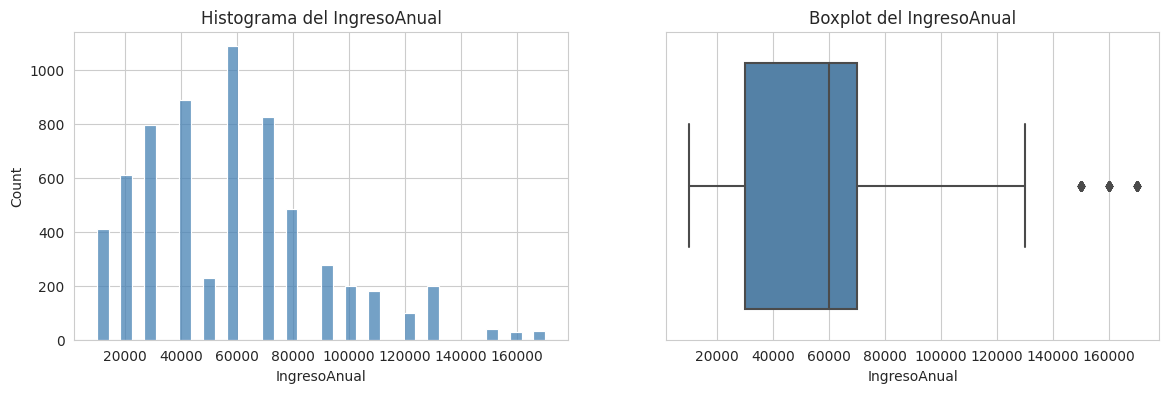

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(data=data, x="IngresoAnual", ax=ax[0], color="steelblue")
ax[0].title.set_text("Histograma del IngresoAnual")
sns.boxplot(data=data, x="IngresoAnual", ax=ax[1], color="steelred")
ax[1].title.set_text("Boxplot del IngresoAnual")
plt.show()

### Total de hijos
El boxplot nos muestra que esta variable no presenta outliers, además la mayoría de los datos se concentran entre los valores 0, 1 y 2.
El histograma nos muestra que la mayor cantidad de registros no tienen hijos y que el valor menos frecuente en nuestro dataset es el de 5 hijos.

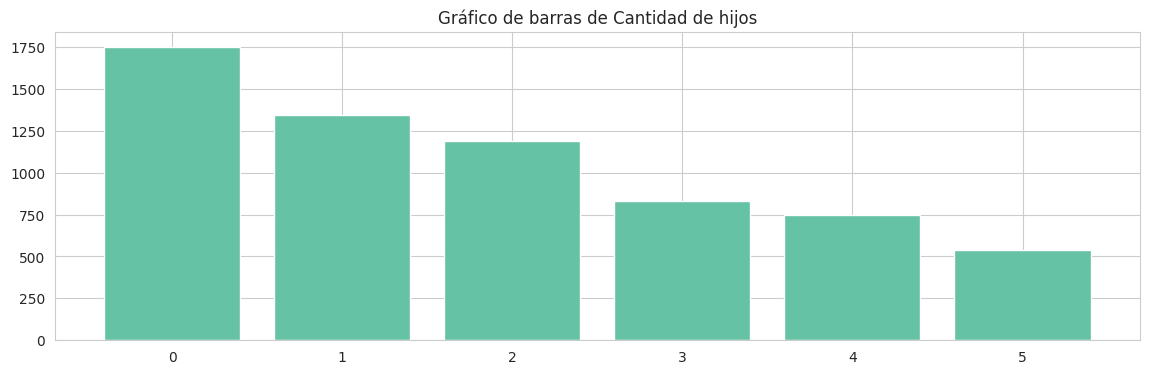

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.bar(["0","1","2","3","4","5"], data["TotalHijos"].value_counts())
ax.title.set_text("Gráfico de barras de Cantidad de hijos")
plt.show()

### Cantidad de automóviles
El boxplot nos muestra un posible outlier, pero el histograma revela que la cantidad de personas con 4 automóviles se asemeja a las que tienen 3, por lo que 4 no es un valor atípico. Si bien la mayoría de las personas tienen 0, 1 o 2 autos en nuestro dataset, no es extraño que haya quienes tengan 3 o 4.


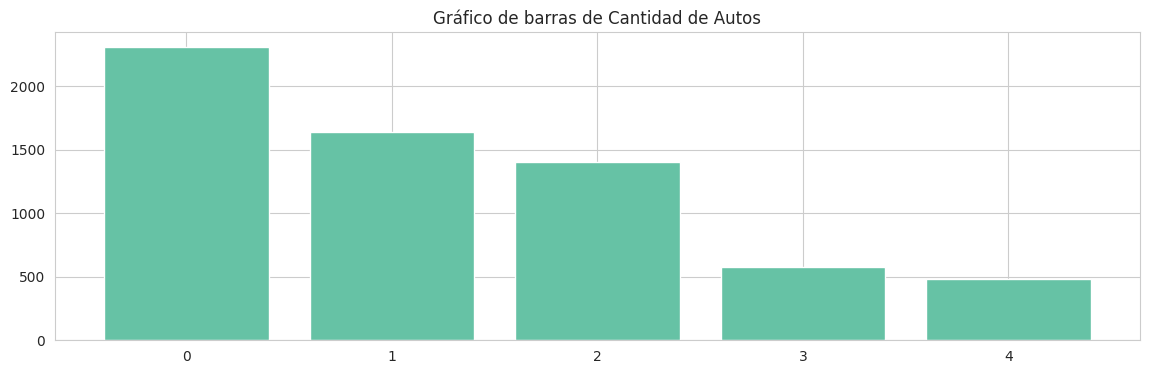

In [ ]:

fig, ax = plt.subplots(figsize=(14, 4))
plt.bar(["0","1","2","3","4"], data["CantAutomoviles"].value_counts())
ax.title.set_text("Gráfico de barras de Cantidad de Autos")
plt.show()

### Edad
Vemos claramente como los datos se concentran entre los 40 y 60 años aproximadamente. El boxplot nos indica que a partir de los 90 años, ya se podríamos considerar outliers estos valores.

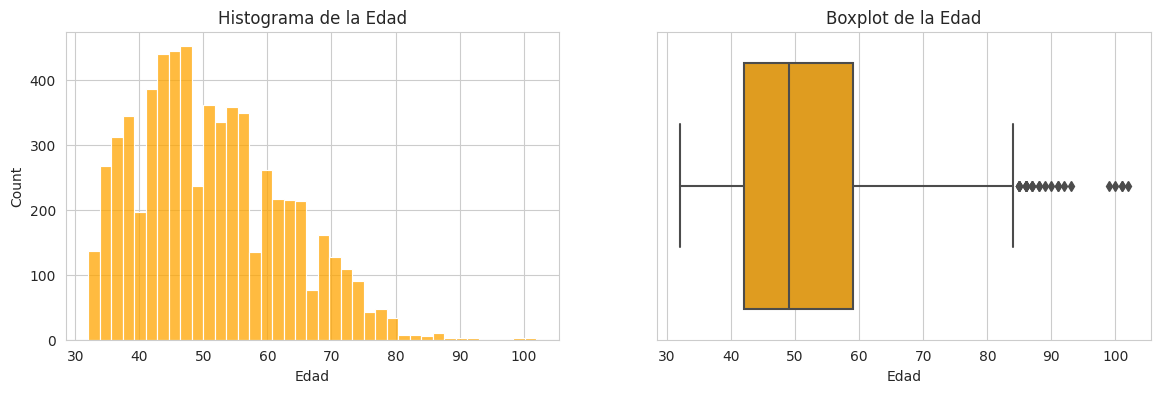

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(data=data, x="Edad", ax=ax[0], color="orange")
ax[0].title.set_text("Histograma de la Edad")
sns.boxplot(data=data, x="Edad", ax=ax[1], color="orange")
ax[1].title.set_text("Boxplot de la Edad")
plt.show()

### Compro Bicicleta
La frecuencia absoluta de la variable a predecir nos indica que tenemos más casos de clientes que no han comprado bicicleta que de aquellos que si lo han hecho.

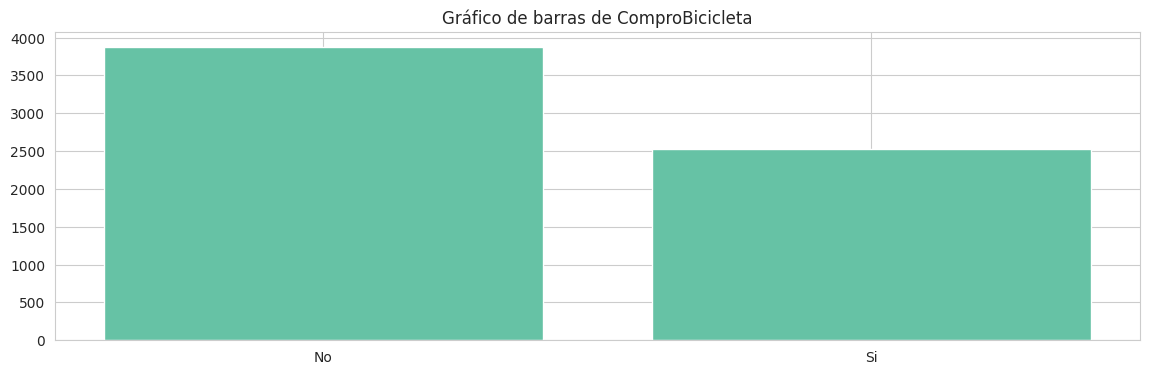

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.bar(["No","Si"], data["ComproBicicleta"].value_counts())
ax.title.set_text("Gráfico de barras de ComproBicicleta")
plt.show()

In [ ]:
data["ComproBici"] = data["ComproBicicleta"].astype("bool")
data["ComproBici"] = data["ComproBici"].astype("str")

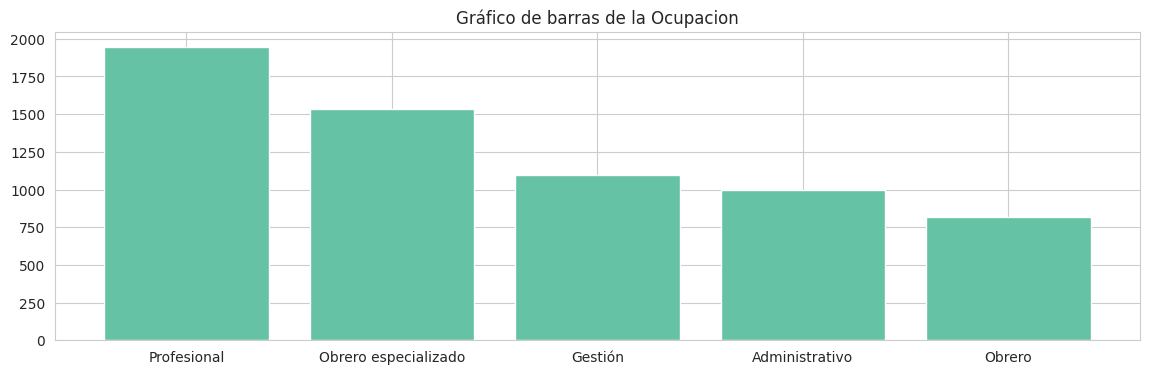

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.bar(["Profesional","Obrero especializado","Gestión","Administrativo","Obrero"], data["Ocupacion"].value_counts())
ax.title.set_text("Gráfico de barras de la Ocupacion")
plt.show()

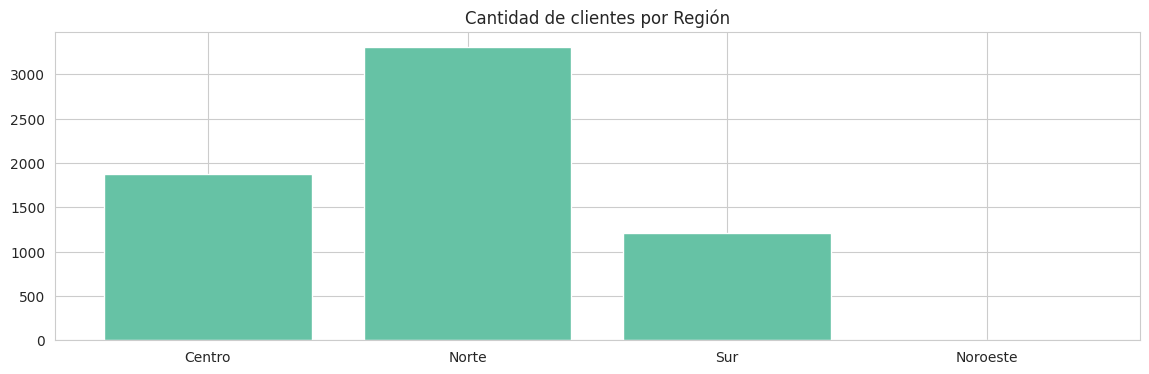

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
order = ["Centro","Norte","Sur","Noroeste"]
plt.bar(["Centro","Norte","Sur","Noroeste"], data["Region"].value_counts().reindex(order))
ax.title.set_text("Cantidad de clientes por Región")
plt.show()

Text(0.5, 1.0, 'Género de los clientes')

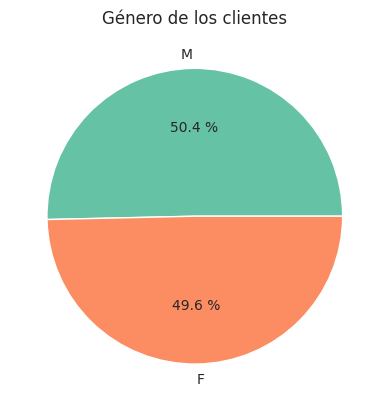

In [ ]:
x=data["Genero"].value_counts()
plt.pie(x, labels=x.index,autopct="%0.1f %%")
plt.title("Género de los clientes")

Text(0.5, 1.0, 'Distancia al trabajo')

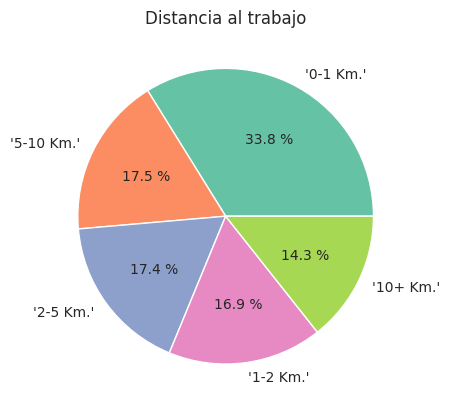

In [ ]:
x=data["Distancia"].value_counts()
plt.pie(x, labels=x.index,autopct="%0.1f %%")
plt.title("Distancia al trabajo")

Text(0.5, 1.0, 'Estado civil')

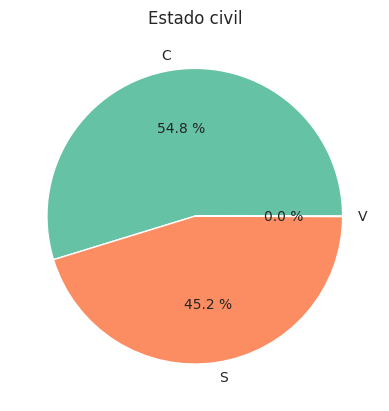

In [ ]:
x=data["EstadoCivil"].value_counts()
plt.pie(x, labels=x.index,autopct="%0.1f %%")
plt.title("Estado civil")

Text(0.5, 1.0, 'Clientes que son propietarios')

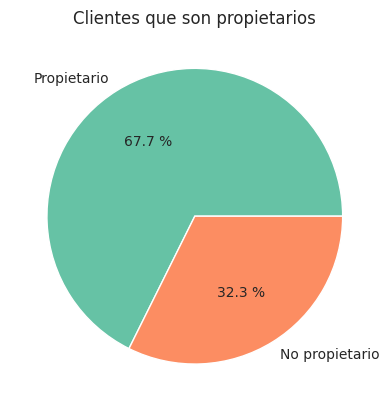

In [ ]:
x=data["Propietario"].value_counts()
plt.pie(x, labels=["Propietario","No propietario"],autopct="%0.1f %%")
plt.title("Clientes que son propietarios")

En el siguiente gráfico vemos el ingreso anual por región, aperturado por si compraron bicilceta o no.
En este caso vemos que el Noroeste solo tiene valores verdaderos para ComproBici, pero debemos tener en cuenta lo analizado previamente, es decir que solo tenemos un registro para esa región, por lo que no es un dato representativo.
Las demás regiones se encuentran niveladas, mostrando un leve aumento del ingreso anual para quienes compraron bicicleta.

Text(0.5, 1.0, 'Ingreso anual por región')

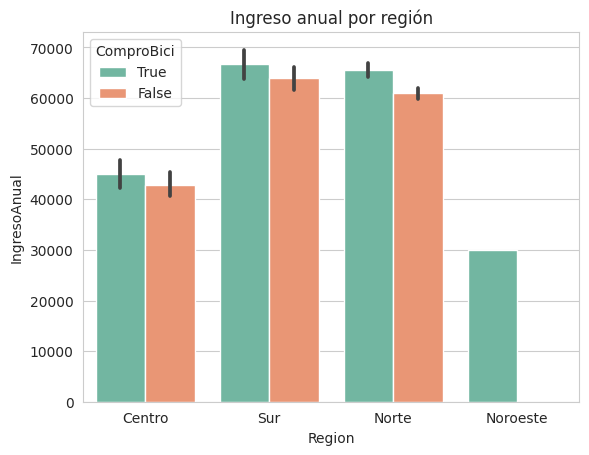

In [ ]:
# Grafico de barras categórica con cuantitativa
sns.barplot(data=data, x="Region", y="IngresoAnual", hue="ComproBici")
plt.title("Ingreso anual por región")

Text(0.5, 1.0, 'Cantidad de automóviles por edad')

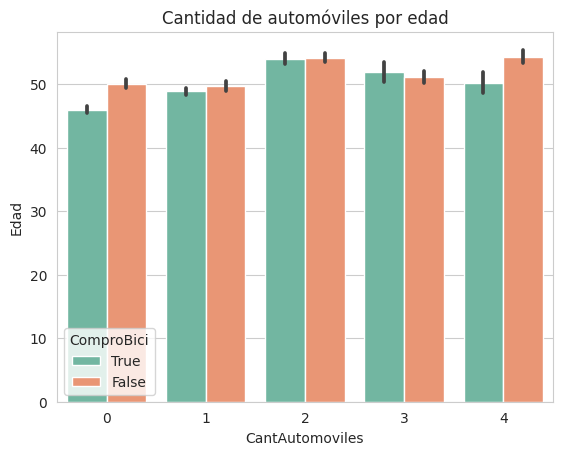

In [ ]:
data["CantAutomoviles"]=data["CantAutomoviles"].astype("str")
sns.barplot(data=data, x="CantAutomoviles", y="Edad", hue="ComproBici", order=["0", "1", "2", "3", "4"])
plt.title("Cantidad de automóviles por edad")

Los sigueintes gráficos nos muestran la cantidad de automóviles y el total de hijos respectivamente por edad, y aperturados por la variable a predecir. En este caso no vemos ningún patrón, ni nada a resaltar.

Text(0.5, 1.0, 'Total de hijos por edad')

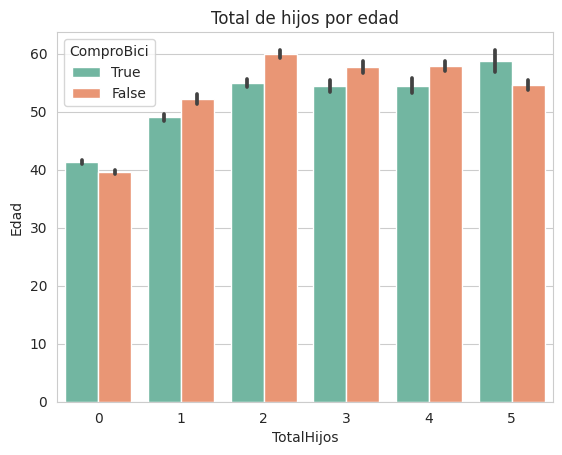

In [ ]:
data["TotalHijos"]=data["TotalHijos"].astype("str")
sns.barplot(data=data, x="TotalHijos", y="Edad", hue="ComproBici", order=["0", "1", "2", "3", "4", "5"])
plt.title("Total de hijos por edad")

Text(0.5, 1.0, 'Ingreso anual por ocupación')

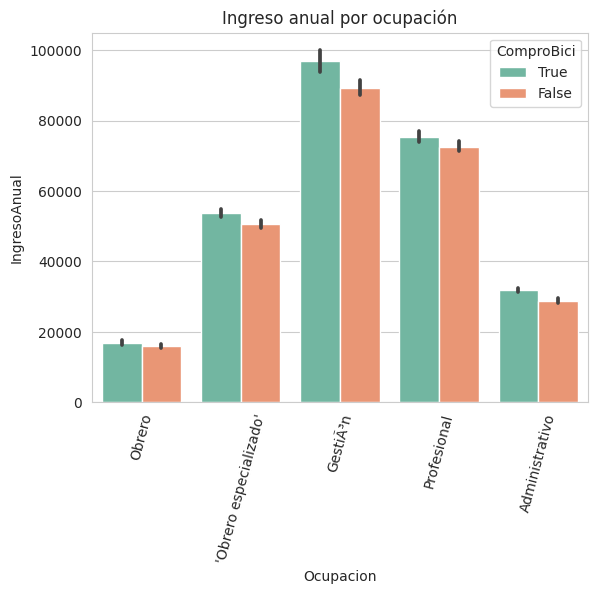

In [ ]:
data["Ocupacion"]=data["Ocupacion"].astype("str")
plt.xticks(rotation=75)
sns.barplot(data=data, x="Ocupacion", y="IngresoAnual", hue="ComproBici")
plt.title("Ingreso anual por ocupación")

Text(0.5, 1.0, 'Ingreso anual por educación')

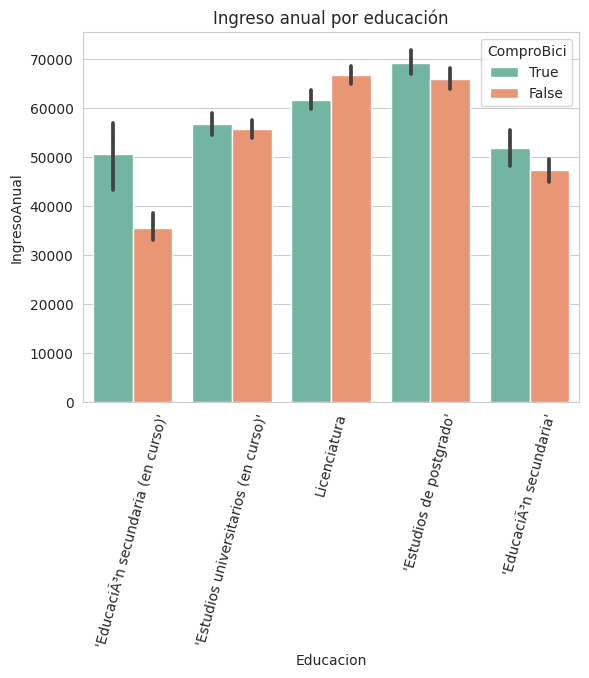

In [ ]:
plt.xticks(rotation=75)
sns.barplot(data=data, x="Educacion", y="IngresoAnual", hue="ComproBici")
plt.title("Ingreso anual por educación")

### Gráfico de dispersión
En el siguiente gráfico vemos que los datos están dispersos. Obvservando la edad, podemos decir para valores mayores a 80 no hay personas que hayan comprado bicicleta. Además, para valores menores a 60 años vemos mayor cantidad de puntos naranjas, es decir, más personas que compraron bicicleta.

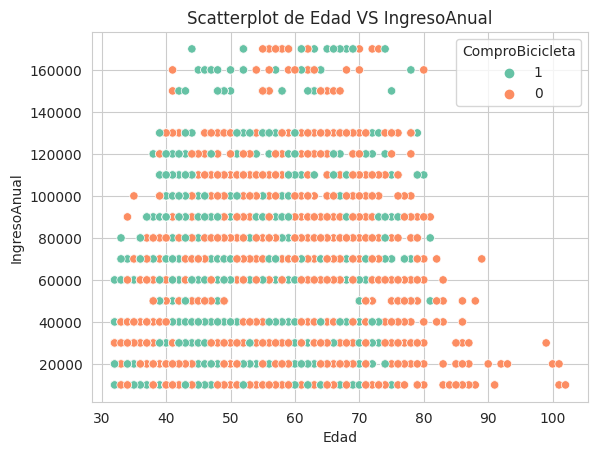

In [ ]:
sns.scatterplot(data=data, x="Edad", y="IngresoAnual", color="red2",hue="ComproBicicleta",hue_order = [1, 0])
plt.title("Scatterplot de Edad VS IngresoAnual")
plt.show()

El siguiente gráfico muestra una simentría entre los boxplots de ingreso anual aperturados por compro bicicleta. Eso indica que el ingreso anual no es un factor determinante en el dataset de entrenamiento y prueba para nuestra variable a predecir.

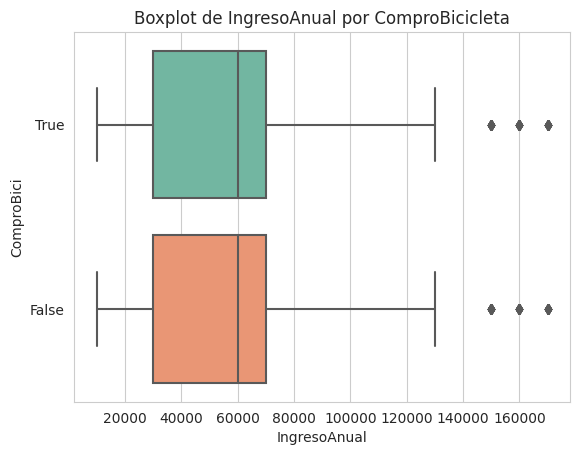

In [ ]:
sns.boxplot(data=data, x="IngresoAnual", y="ComproBici")
plt.title("Boxplot de IngresoAnual por ComproBicicleta")
plt.show()

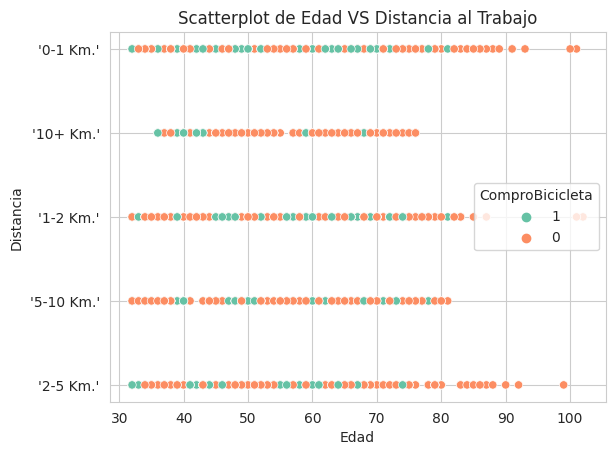

In [ ]:
sns.scatterplot(data=data, x="Edad", y="Distancia", color="red2",hue="ComproBicicleta",hue_order = [1, 0])
plt.title("Scatterplot de Edad VS Distancia al Trabajo")
plt.show()

Vemos que quienes no han comprado bicicleta tienen edades más altas, lo cual se debe a que no es un producto que se consuma usualmente por ancianos.

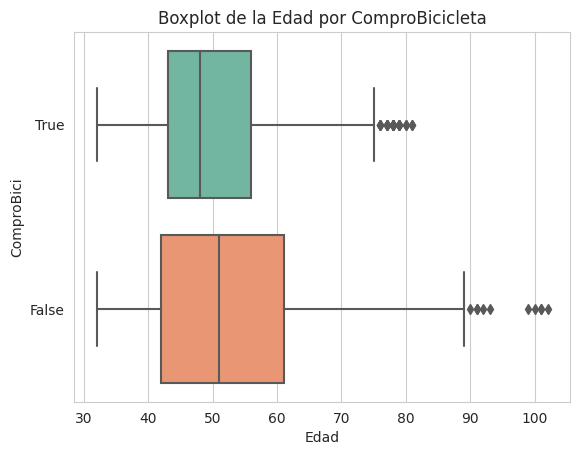

In [ ]:
sns.boxplot(data=data, x="Edad", y="ComproBici")
plt.title("Boxplot de la Edad por ComproBicicleta")
plt.show()

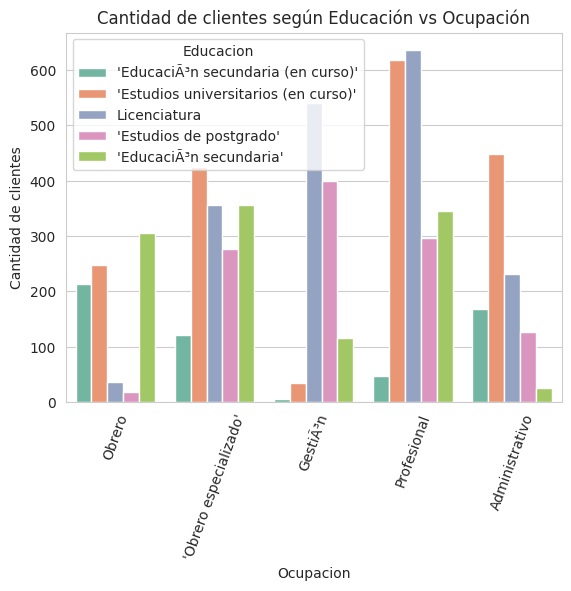

In [ ]:
sns.countplot(data=data, x="Ocupacion", hue="Educacion")
plt.xlabel("Ocupacion")
plt.ylabel("Cantidad de clientes")
plt.title("Cantidad de clientes según Educación vs Ocupación")
plt.xticks(rotation=70)
plt.show()

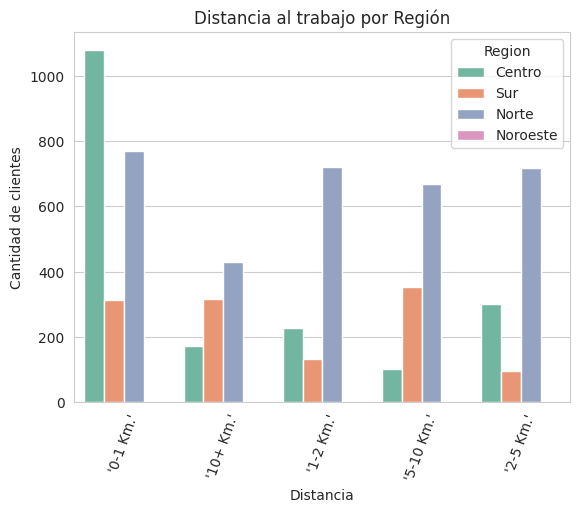

In [ ]:
sns.countplot(data=data, x="Distancia", hue="Region")
plt.xlabel("Distancia")
plt.ylabel("Cantidad de clientes")
plt.title("Distancia al trabajo por Región")
plt.xticks(rotation=70)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Obrero'),
  Text(1, 0, "'Obrero especializado'"),
  Text(2, 0, 'GestiÃ³n'),
  Text(3, 0, 'Profesional'),
  Text(4, 0, 'Administrativo')])

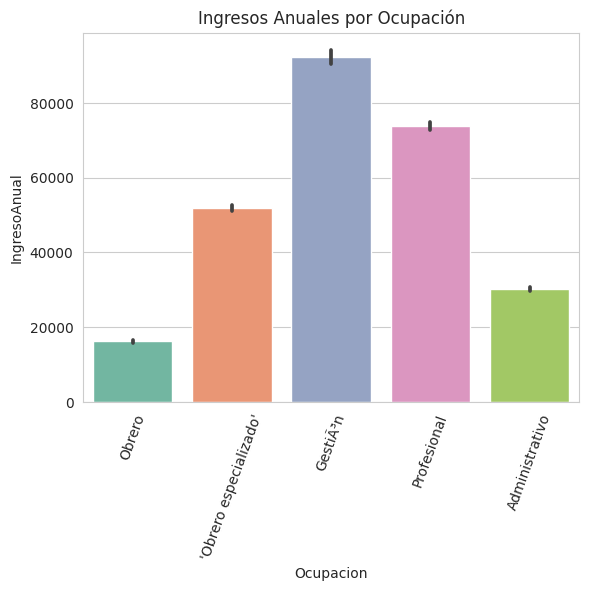

In [ ]:
# Grafico de barras categórica con cuantitativa
plt.title("Ingresos Anuales por Ocupación")
sns.barplot(data=data, x="Ocupacion", y="IngresoAnual")
plt.xticks(rotation=70)

## Matriz S o matriz de correlación
La matriz de correlación es una tabla que muestra la relación entre cada par de variables en un conjunto de datos. Los valores de la matriz de correlación van desde -1 hasta 1.
Valores cercanos a -1 indican una correlación negativa perfecta, lo que significa que las variables se mueven en direcciones opuestas. Esto indica que cuando una variable aumenta, la otra disminuye y viceversa.
Valores cercanos a 0 indican una falta de correlación o correlación débil entre las variables. Esto significa que no hay una relación significativa entre las variables.
Valores cercanos a 1 indican una correlación positiva perfecta, lo que significa que las variables se mueven en la misma dirección. Esto indica que cuando una variable aumenta, la otra también aumenta.

Es importante tener en cuenta que la correlación no implica causalidad. Dos variables pueden estar correlacionadas sin que una cause la otra.


In [ ]:
data_columns = ["IngresoAnual","Edad"]
data[data_columns].corr()

,IngresoAnual,Edad
IngresoAnual,1.000000,0.153101
Edad,0.153101,1.000000


Vemos que no hay ningún valor que se acerque a -1 ni a 1, por lo que las variables no están relacionadas, no debemos preocuparnos.

## Matriz de covarianza
A diferencia de la correlación, la covarianza no está normalizada y su magnitud depende de las unidades de las variables involucradas. Esto significa que la covarianza no puede ser utilizada para comparar la fuerza de la relación lineal entre dos pares de variables que tienen unidades diferentes.

In [ ]:
data_columns = ["IngresoAnual","Edad"]
data[data_columns].cov()

,IngresoAnual,Edad
IngresoAnual,1.045356e+09,57017.474038
Edad,5.701747e+04,132.657363


Dado que todas las variables tienen unidades diferentes, la matriz de covarianza no es de utilidad para nuestro análisis.

# Calidad de los datos
A lo largo del análisis realizado hasta el momento hemos detectado, gracias a los gráficos mostrados, la presencia de outliers y de datos faltantes. A continuación los analizaremos en mayor detalle para decidir qué hacer con esos registros.

## Análisis de datos faltantes
Vemos la cantidad de datos no nulos para cada variable. La única que presenta datos faltantes es IngresoAnual.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IdCliente           6400 non-null   int64  
 1   IdCiudad            6400 non-null   int64  
 2   Nombre              6400 non-null   object 
 3   Apellido            6400 non-null   object 
 4   FechaNacimiento     6400 non-null   object 
 5   EstadoCivil         6400 non-null   object 
 6   Genero              6400 non-null   object 
 7   Email               6400 non-null   object 
 8   IngresoAnual        6390 non-null   float64
 9   TotalHijos          6400 non-null   object 
 10  Educacion           6400 non-null   object 
 11  Ocupacion           6400 non-null   object 
 12  Propietario         6400 non-null   int64  
 13  CantAutomoviles     6400 non-null   object 
 14  Direccion           6400 non-null   object 
 15  Telefono            6400 non-null   object 
 16  FechaP

In [ ]:
#  Generamos variables booleanas que indican si hay valores nulos (NaN) y en que posición se encuentran en cada una de las columnas
c_edad_na = data["Edad"].isna()
c_th_na = data["TotalHijos"].isna()
c_igA_na = data["IngresoAnual"].isna()
c_aut_na = data["CantAutomoviles"].isna()
c_ec_na = data["EstadoCivil"].isna()
c_gen_na = data["Genero"].isna()
c_edu_na = data["Educacion"].isna()
c_ocu_na = data["Ocupacion"].isna()
c_prop_na = data["Propietario"].isna()
c_dis_na = data["Distancia"].isna()
c_reg_na = data["Region"].isna()


In [ ]:
data[c_edad_na | c_th_na | c_igA_na | c_aut_na | c_ec_na | c_gen_na | c_edu_na | c_ocu_na | c_prop_na | c_dis_na | c_reg_na]

,IdCliente,IdCiudad,Nombre,Apellido,FechaNacimiento,EstadoCivil,Genero,Email,IngresoAnual,TotalHijos,...,Propietario,CantAutomoviles,Direccion,Telefono,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta,ComproBici
61,23153,312,Jenna,Hill,15/02/1969,C,F,jenna12@mineriadedatos.com.ar,NaN,1,...,1,1,'9416 Shadow Falls Drive',161-555-0182,22/09/2007,'0-1 Km.',Norte,44,0,False
725,21726,63,Morgan,Hall,22/08/1973,S,F,morgan45@mineriadedatos.com.ar,NaN,0,...,0,0,'4387 Treat Blvd',417-555-0179,15/01/2008,'0-1 Km.',Norte,39,0,False
1205,16685,13,Robin,Dominguez,13/06/1962,S,F,robin9@mineriadedatos.com.ar,NaN,1,...,1,1,'3296 Trinity Ave','500 555-0196',10/08/2005,'5-10 Km.',Sur,50,1,True
2523,25844,312,Riley,Butler,19/10/1940,S,F,riley12@mineriadedatos.com.ar,NaN,4,...,0,2,'3271 Norse Ct',293-555-0134,12/08/2007,'1-2 Km.',Norte,72,0,False
3082,16806,302,Louis,Zhao,04/08/1950,C,M,louis4@mineriadedatos.com.ar,NaN,2,...,1,1,'1899 Hooftrail Way',100-555-0146,09/06/2008,'2-5 Km.',Norte,62,0,False
4531,20603,31,Henry,Sullivan,03/01/1976,S,M,henry14@mineriadedatos.com.ar,NaN,0,...,1,3,'4429 Pine Creek Way','500 555-0186',24/10/2007,'10+ Km.',Sur,37,0,False
4871,19246,618,Carlos,Campbell,09/08/1971,C,M,carlos34@mineriadedatos.com.ar,NaN,1,...,1,0,'7022 Muth Dr.',563-555-0146,11/01/2008,'1-2 Km.',Norte,41,0,False
5264,15926,153,Donna,Deng,12/02/1956,S,F,donna2@mineriadedatos.com.ar,NaN,3,...,1,4,'Nollendorfplatz 5118','500 555-0169',02/09/2006,'5-10 Km.',Centro,57,1,True
6018,21846,121,Kevin,Patterson,09/11/1954,C,M,kevin13@mineriadedatos.com.ar,NaN,3,...,1,4,'Charlottenstr 844','500 555-0164',16/09/2007,'10+ Km.',Centro,58,0,False
6214,28686,135,Sheena,Jai,23/03/1970,S,F,sheena9@mineriadedatos.com.ar,NaN,2,...,1,0,'Klara StraÃe 2464','500 555-0153',21/03/2008,'0-1 Km.',Centro,43,1,True


La unica variable con datos faltantes es IngresoAnual, con 10 registros nulos. Reemplazamos los valores faltantes con el valor de la mediana de los valores no faltantes de esa columna para que estos registros sean de utilidad a la hora de entrenar nuestro modelo. Elegimos la mediana ya que al no contar con valores atípicos es razonable usarla.

In [ ]:
data.loc[c_igA_na, "IngresoAnual"] = data.IngresoAnual.median()
data[c_igA_na]

,IdCliente,IdCiudad,Nombre,Apellido,FechaNacimiento,EstadoCivil,Genero,Email,IngresoAnual,TotalHijos,...,Propietario,CantAutomoviles,Direccion,Telefono,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta,ComproBici
61,23153,312,Jenna,Hill,15/02/1969,C,F,jenna12@mineriadedatos.com.ar,60000.0,1,...,1,1,'9416 Shadow Falls Drive',161-555-0182,22/09/2007,'0-1 Km.',Norte,44,0,False
725,21726,63,Morgan,Hall,22/08/1973,S,F,morgan45@mineriadedatos.com.ar,60000.0,0,...,0,0,'4387 Treat Blvd',417-555-0179,15/01/2008,'0-1 Km.',Norte,39,0,False
1205,16685,13,Robin,Dominguez,13/06/1962,S,F,robin9@mineriadedatos.com.ar,60000.0,1,...,1,1,'3296 Trinity Ave','500 555-0196',10/08/2005,'5-10 Km.',Sur,50,1,True
2523,25844,312,Riley,Butler,19/10/1940,S,F,riley12@mineriadedatos.com.ar,60000.0,4,...,0,2,'3271 Norse Ct',293-555-0134,12/08/2007,'1-2 Km.',Norte,72,0,False
3082,16806,302,Louis,Zhao,04/08/1950,C,M,louis4@mineriadedatos.com.ar,60000.0,2,...,1,1,'1899 Hooftrail Way',100-555-0146,09/06/2008,'2-5 Km.',Norte,62,0,False
4531,20603,31,Henry,Sullivan,03/01/1976,S,M,henry14@mineriadedatos.com.ar,60000.0,0,...,1,3,'4429 Pine Creek Way','500 555-0186',24/10/2007,'10+ Km.',Sur,37,0,False
4871,19246,618,Carlos,Campbell,09/08/1971,C,M,carlos34@mineriadedatos.com.ar,60000.0,1,...,1,0,'7022 Muth Dr.',563-555-0146,11/01/2008,'1-2 Km.',Norte,41,0,False
5264,15926,153,Donna,Deng,12/02/1956,S,F,donna2@mineriadedatos.com.ar,60000.0,3,...,1,4,'Nollendorfplatz 5118','500 555-0169',02/09/2006,'5-10 Km.',Centro,57,1,True
6018,21846,121,Kevin,Patterson,09/11/1954,C,M,kevin13@mineriadedatos.com.ar,60000.0,3,...,1,4,'Charlottenstr 844','500 555-0164',16/09/2007,'10+ Km.',Centro,58,0,False
6214,28686,135,Sheena,Jai,23/03/1970,S,F,sheena9@mineriadedatos.com.ar,60000.0,2,...,1,0,'Klara StraÃe 2464','500 555-0153',21/03/2008,'0-1 Km.',Centro,43,1,True


## Análisis de Outliers
Un valor más extremo (outlier) es un valor en un conjunto de datos que es muy diferente de los otros valores. Analizaremos los outliers que vimos en los gráficos expuestos anteriormente, para decidir cómo impactarían estos registros en nuestro modelo.

In [ ]:
data[data["Edad"] >= 99]

,IdCliente,IdCiudad,Nombre,Apellido,FechaNacimiento,EstadoCivil,Genero,Email,IngresoAnual,TotalHijos,...,Propietario,CantAutomoviles,Direccion,Telefono,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta,ComproBici
336,16455,208,Deb,Moreno,13/08/1911,C,F,deb3@mineriadedatos.com.ar,10000.0,4,...,0,2,'99 rue du DÃ©part','500 555-0144',28/09/2007,'0-1 Km.',Centro,101,0,False
571,12725,171,Gabrielle,James,13/08/1910,C,F,gabrielle17@mineriadedatos.com.ar,10000.0,4,...,0,2,'Nonnendamm 6500','500 555-0125',19/02/2008,'1-2 Km.',Centro,102,0,False
1460,25527,223,Robert,Johnson,11/05/1913,S,M,robert85@mineriadedatos.com.ar,20000.0,2,...,0,2,'9 route de Marseille','500 555-0138',29/03/2008,'0-1 Km.',Centro,100,0,False
1778,14841,171,Franklin,Pal,07/12/1911,C,M,franklin30@mineriadedatos.com.ar,20000.0,2,...,1,1,'Wertheimer StraÃe 8','500 555-0185',05/03/2008,'1-2 Km.',Centro,101,0,False
2230,16325,267,Emma,Williams,10/09/1913,S,F,emma1@mineriadedatos.com.ar,30000.0,1,...,1,1,'2427 Marvello Lane','500 555-0182',12/04/2008,'2-5 Km.',Centro,99,0,False


In [ ]:
data[data["IngresoAnual"] >= 160000]

,IdCliente,IdCiudad,Nombre,Apellido,FechaNacimiento,EstadoCivil,Genero,Email,IngresoAnual,TotalHijos,...,Propietario,CantAutomoviles,Direccion,Telefono,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta,ComproBici
60,23615,275,Kendra,Suarez,13/04/1945,C,F,kendra19@mineriadedatos.com.ar,160000.0,3,...,1,4,'1446 Partridge Dr','500 555-0149',03/04/2008,'0-1 Km.',Centro,68,0,False
148,15361,368,Thomas,Gonzales,18/05/1933,S,M,thomas19@mineriadedatos.com.ar,160000.0,0,...,0,4,'2489 Driving Drive',709-555-0190,27/07/2008,'0-1 Km.',Norte,80,0,False
166,19940,254,Rosa,Ye,15/02/1949,C,F,rosa10@mineriadedatos.com.ar,160000.0,3,...,0,4,'7638 Diokmo Ct.','500 555-0181',02/06/2007,'10+ Km.',Centro,64,1,True
192,14251,368,Alex,Brooks,22/08/1942,C,M,alex4@mineriadedatos.com.ar,170000.0,2,...,1,2,'2050 B Avenue I',488-555-0151,09/05/2008,'5-10 Km.',Norte,70,0,False
298,28907,267,Blake,Jenkins,19/02/1951,C,M,blake54@mineriadedatos.com.ar,160000.0,4,...,0,3,'1156 Dublin Court','500 555-0111',25/03/2008,'10+ Km.',Centro,62,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,16906,59,Brittany,Flores,12/08/1938,C,F,brittany11@mineriadedatos.com.ar,170000.0,1,...,1,4,'6310 Jamie Way',367-555-0114,11/02/2008,'2-5 Km.',Norte,74,1,True
6256,25162,374,Bryan,Morris,11/11/1964,S,M,bryan19@mineriadedatos.com.ar,160000.0,1,...,0,3,'9634 S. Silver Spring',729-555-0131,15/11/2007,'0-1 Km.',Norte,48,1,True
6327,26540,310,Jada,Sanchez,22/10/1968,S,F,jada16@mineriadedatos.com.ar,170000.0,1,...,0,1,'3009 Temple Court',910-555-0113,30/11/2006,'0-1 Km.',Norte,44,1,True
6352,23618,274,Dale,Holt,04/08/1946,C,M,dale8@mineriadedatos.com.ar,170000.0,4,...,1,3,'9781 Bird Dr.','500 555-0147',12/08/2007,'0-1 Km.',Centro,66,1,True


Decidimos no eliminar o reemplazar los outliers ya que no dan indicios de errores de carga o tipeo.






# Especifiación de la vista minable
Exportamos el dataframe resultante de la limpieza de datos para luego utilizarlo en la construcción del modelo.

In [ ]:
data.to_csv('clientesNew.csv')